# Tutorial 10: Validation

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235

Split our dataset into a train and validation set. We will use the validation set to check the performance of our model. The size of the validation set is 20% of our total dataset. Adapt the size with the parameter `valid_p` in `split_df`.

In [2]:
df_train, df_val = m.split_df(df, valid_p=0.2)

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 1462
Train dataset size: 1170
Validation dataset size: 292


Validation is performed by passing the validation set to the fit method during training. The resulting metrics show the performance of the model compared to our validation set.

In [3]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,112.367043,126.629135,1.437250,0.0,0,64.334152,78.634903,0.548189,0.0
1,77.515678,87.047234,0.861561,0.0,1,52.298843,63.926777,0.401271,0.0
2,30.390057,31.929953,0.146747,0.0,2,27.631084,33.793175,0.127590,0.0
3,23.789066,25.054907,0.090356,0.0,3,16.225889,19.081343,0.035567,0.0
4,13.297073,15.146704,0.033022,0.0,4,11.112559,13.736763,0.019133,0.0
5,8.671577,10.540069,0.015990,0.0,5,8.207967,10.699882,0.012010,0.0
6,7.701571,9.421665,0.012777,0.0,6,7.194078,9.504014,0.009714,0.0
7,7.569171,9.355480,0.012598,0.0,7,6.820821,9.057066,0.008735,0.0
8,7.075397,8.800294,0.011147,0.0,8,6.715597,8.839603,0.008442,0.0
9,7.877214,9.918156,0.014159,0.0,9,6.616748,8.699051,0.008118,0.0


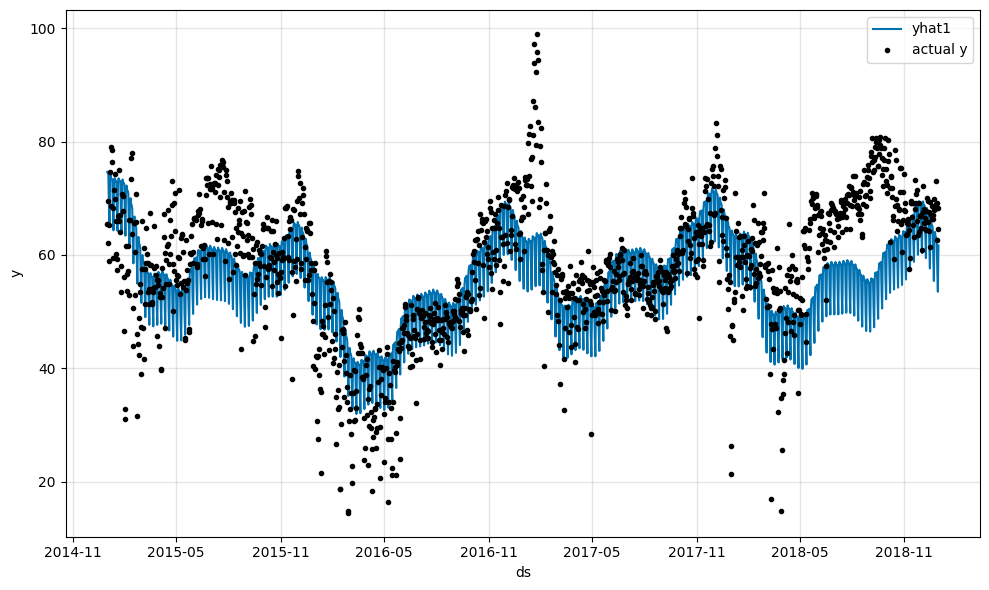

In [4]:
forecast = m.predict(df)
m.plot(forecast)

For advanced validation and testing methods, check out the *Test and CrossValidate* tutorial in the *How to guides* section.
